In [14]:
import pandas as pd 
import matpl
dtypes = {'TRAIL_NUMBER': 'str', 'ORIGIN_AIRPORT': 'str','DESTINATION_AIRPORT': 'str'}
df_flights = pd.read_csv('flights.csv',delimiter=',',header='infer',dtype=dtypes , low_memory=False)
df_flights.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



The dataset contains observations of US domestic flights in 2013 and consists of the following fields:
- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed (1 for Monday, 7 for Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure airport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination airport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flights that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flights that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled




In [42]:
print(df_flights.columns)
df_flights.isnull().sum()

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIRLINE_DELAY'],
      dtype='object')


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_TIME               6
DISTANCE                     0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
AIRLINE_DELAY          4755640
dtype: int64

In [46]:

columns_to_drop=['TAIL_NUMBER','AIRLINE_DELAY','DISTANCE']
df_flights.drop(columns=columns_to_drop, axis=1, inplace=True)
df_flights.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
SCHEDULED_TIME              6
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

In [47]:
print(df_flights.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED'],
      dtype='object')


In [48]:
df_flights[df_flights.isnull().any(axis=1)][['DEPARTURE_TIME','DEPARTURE_DELAY','ARRIVAL_TIME','ARRIVAL_DELAY']]


,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_TIME,ARRIVAL_DELAY
32,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN
...,...,...,...,...
5818157,NaN,NaN,NaN,NaN
5818160,2013.0,13.0,2325.0,NaN
5818318,NaN,NaN,NaN,NaN
5818777,NaN,NaN,NaN,NaN


In [52]:
columns_to_analyze=['DEPARTURE_DELAY','DEPARTURE_TIME','ARRIVAL_TIME','ARRIVAL_DELAY']
df_flights[columns_to_analyze].describe()

,DEPARTURE_DELAY,DEPARTURE_TIME,ARRIVAL_TIME,ARRIVAL_DELAY
count,5.732926e+06,5.732926e+06,5.726566e+06,5.714008e+06
mean,9.370158e+00,1.335204e+03,1.476491e+03,4.407057e+00
std,3.708094e+01,4.964233e+02,5.263197e+02,3.927130e+01
min,-8.200000e+01,1.000000e+00,1.000000e+00,-8.700000e+01
25%,-5.000000e+00,9.210000e+02,1.059000e+03,-1.300000e+01
50%,-2.000000e+00,1.330000e+03,1.512000e+03,-5.000000e+00
75%,7.000000e+00,1.740000e+03,1.917000e+03,8.000000e+00
max,1.988000e+03,2.400000e+03,2.400000e+03,1.971000e+03


In [57]:

columns_to_fill=['DEPARTURE_DELAY','DEPARTURE_TIME','ARRIVAL_TIME','ARRIVAL_DELAY']
df_flights[columns_to_fill] = df_flights[columns_to_fill].fillna(df_flights[columns_to_fill].mean())
df_flights.isnull().sum()


YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_TIME         6
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

Clean outliers:   
View the distribution and summary statistics for the DEPARTURE_DELAY and ARRIVAL_DELAY columns.

DEPARTURE_DELAY 
Minimum:-8.00
Mean:-4.53
Median:-4.00
Mode:-5.00
Maximum:-2.00



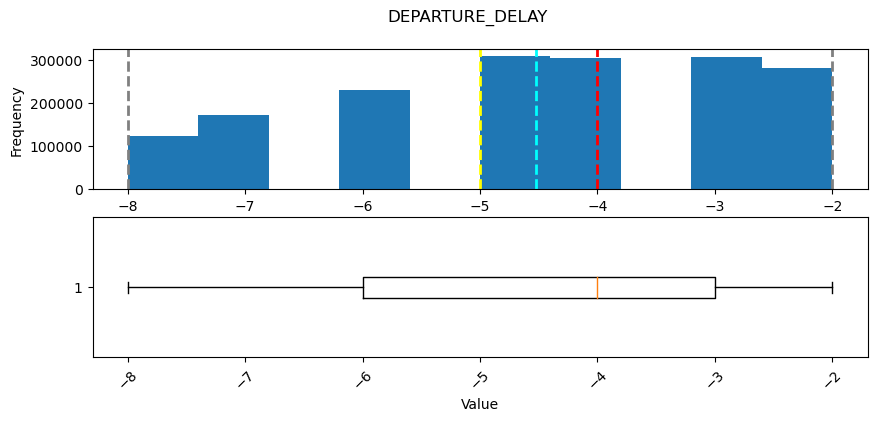

ARRIVAL_DELAY 
Minimum:-25.00
Mean:-12.80
Median:-12.00
Mode:-10.00
Maximum:-4.00



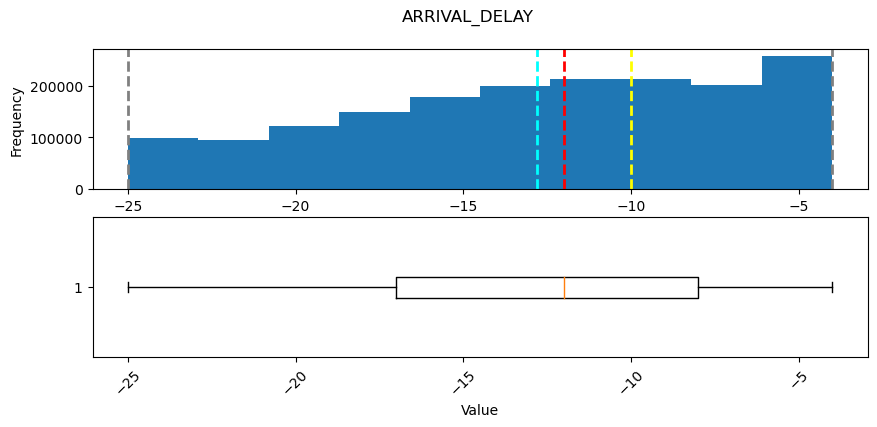

In [112]:
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    plt.xticks(rotation=45)

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    plt.show()
# Call the function for each delay field
delayFields = ['DEPARTURE_DELAY','ARRIVAL_DELAY']
for col in delayFields:
    show_distribution(df_flights[col])


There are a outliers at the lower and upper ends of both variables - particularly at the upper end.

Let's trim the data so that we include only rows where the values for these fields are within the 1st and 90th percentile.

DEPARTURE_DELAY 
Minimum:-7.00
Mean:-4.76
Median:-5.00
Mode:-5.00
Maximum:-3.00



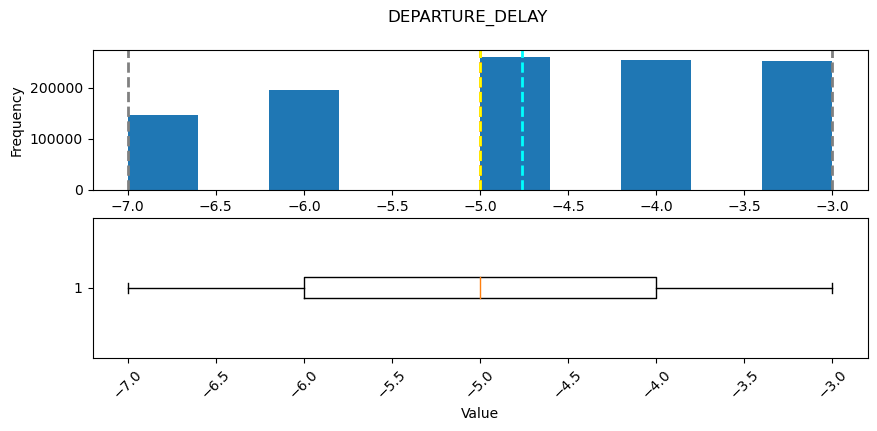

ARRIVAL_DELAY 
Minimum:-24.00
Mean:-14.00
Median:-13.00
Mode:-11.00
Maximum:-7.00



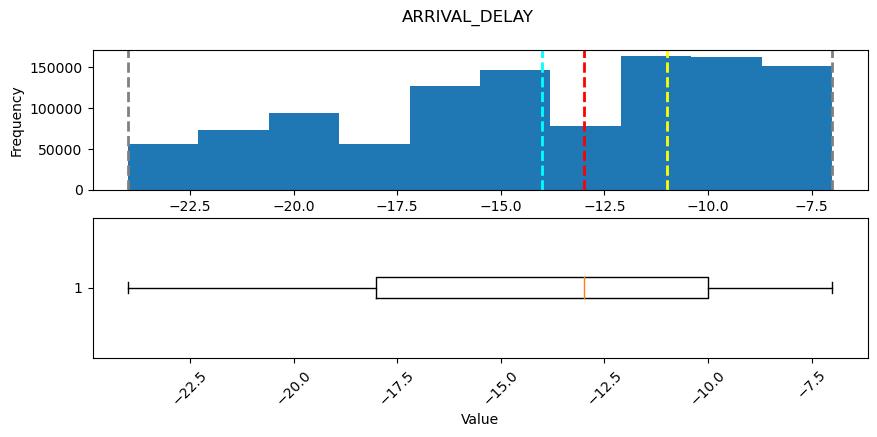

In [113]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ARRIVAL_DELAY_01pcntile = df_flights.ARRIVAL_DELAY.quantile(0.01)
ARRIVAL_DELAY_90pcntile = df_flights.ARRIVAL_DELAY.quantile(0.90)
df_flights = df_flights[df_flights.ARRIVAL_DELAY < ARRIVAL_DELAY_90pcntile]
df_flights = df_flights[df_flights.ARRIVAL_DELAY > ARRIVAL_DELAY_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DEPARTURE_DELAY_01pcntile = df_flights.DEPARTURE_DELAY.quantile(0.01)
DEPARTURE_DELAY_90pcntile = df_flights.DEPARTURE_DELAY.quantile(0.90)
df_flights = df_flights[df_flights.DEPARTURE_DELAY < DEPARTURE_DELAY_90pcntile]
df_flights = df_flights[df_flights.DEPARTURE_DELAY > DEPARTURE_DELAY_01pcntile]

# View the revised distributions
for col in delayFields:
    show_distribution(df_flights[col])

That looks a bit better.

Explore the data


Let's start with an overall view of the summary statistics for the numeric columns.

In [114]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
count,1110084.0,1.110084e+06,1.110084e+06,1.110084e+06,1.110084e+06,1.110084e+06,1.110084e+06,1.110084e+06,1.110084e+06,1.110084e+06,1.110084e+06,1.110084e+06,1110084.0,1110084.0
mean,2015.0,6.762613e+00,1.573432e+01,3.936081e+00,2.223873e+03,1.244509e+03,1.233513e+03,-4.759236e+00,1.325098e+02,1.412466e+03,1.397256e+03,-1.399509e+01,0.0,0.0
std,0.0,3.344237e+00,8.783357e+00,1.996987e+00,1.732156e+03,4.887552e+02,4.907755e+02,1.336466e+00,6.687042e+01,4.989411e+02,4.951917e+02,4.711072e+00,0.0,0.0
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,-7.000000e+00,2.000000e+01,1.000000e+00,1.000000e+00,-2.400000e+01,0.0,0.0
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.950000e+02,8.200000e+02,8.160000e+02,-6.000000e+00,8.500000e+01,1.016000e+03,1.005000e+03,-1.800000e+01,0.0,0.0
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.774000e+03,1.200000e+03,1.156000e+03,-5.000000e+00,1.150000e+02,1.359000e+03,1.349000e+03,-1.300000e+01,0.0,0.0
75%,2015.0,1.000000e+01,2.300000e+01,6.000000e+00,3.267000e+03,1.637000e+03,1.632000e+03,-4.000000e+00,1.610000e+02,1.820000e+03,1.810000e+03,-1.000000e+01,0.0,0.0
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,8.409000e+03,2.359000e+03,2.400000e+03,-3.000000e+00,7.050000e+02,2.359000e+03,2.400000e+03,-7.000000e+00,0.0,0.0


In [115]:
df_flights[delayFields].mean()

DEPARTURE_DELAY    -4.759236
ARRIVAL_DELAY     -13.995085
dtype: float64

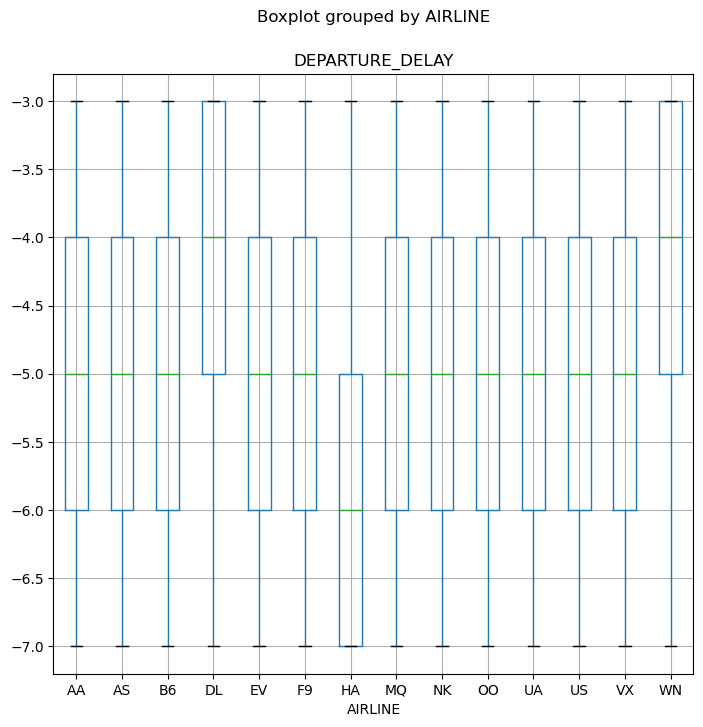

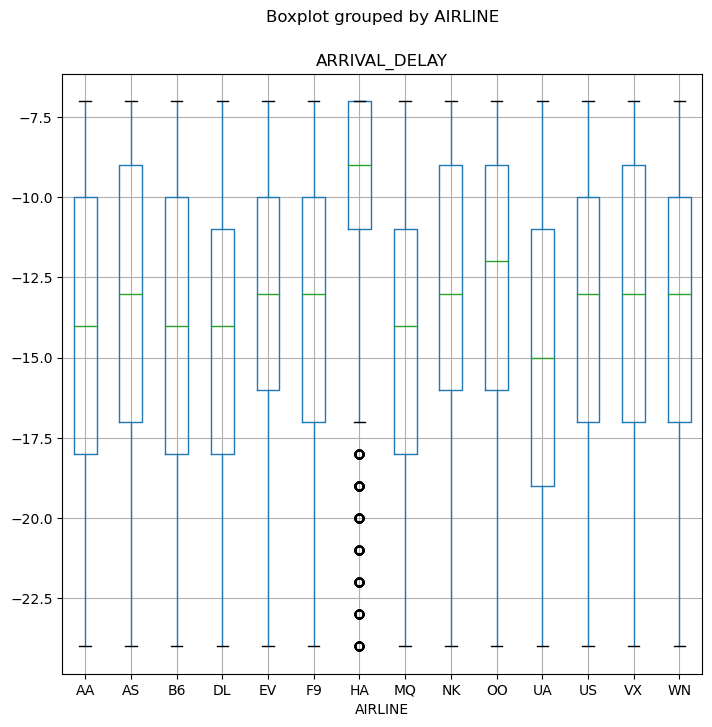

In [116]:
for col in delayFields:
    df_flights.boxplot(column=col, by='AIRLINE', figsize=(8,8))

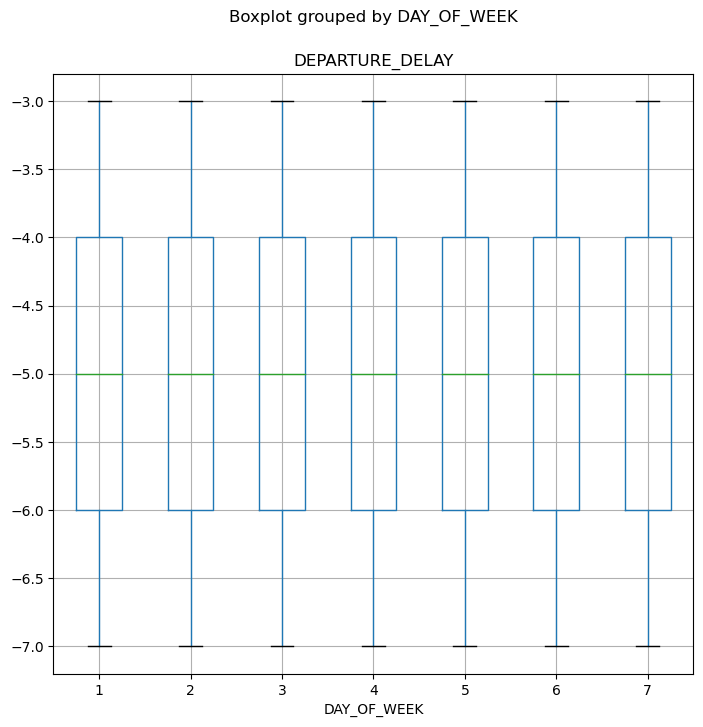

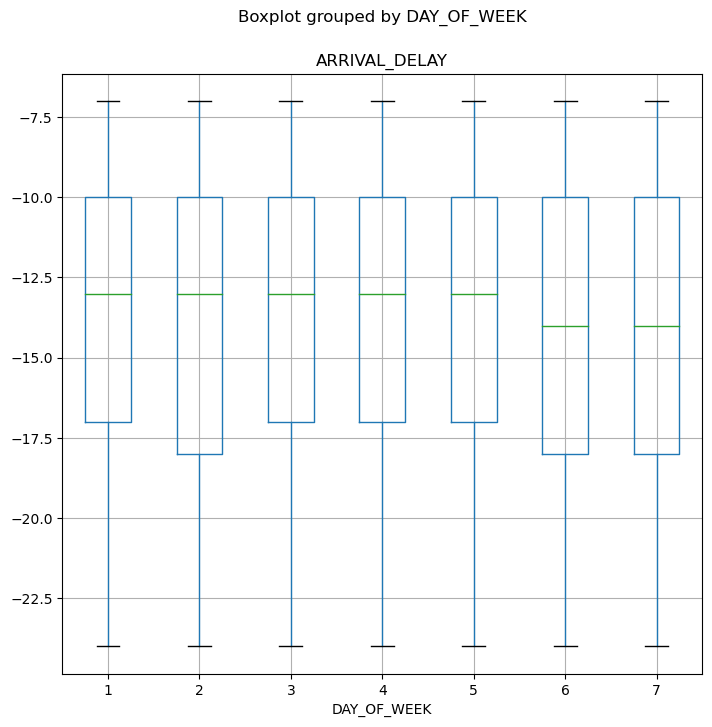

In [117]:
for col in delayFields:
    df_flights.boxplot(column=col, by='DAY_OF_WEEK', figsize=(8,8))

,DEPARTURE_DELAY
ORIGIN_AIRPORT,
10165,-3.000000
14986,-4.015152
MLB,-4.078475
ILG,-4.200000
13796,-4.242331
...,...
14683,-4.737617
13244,-4.739024
ONT,-4.740361


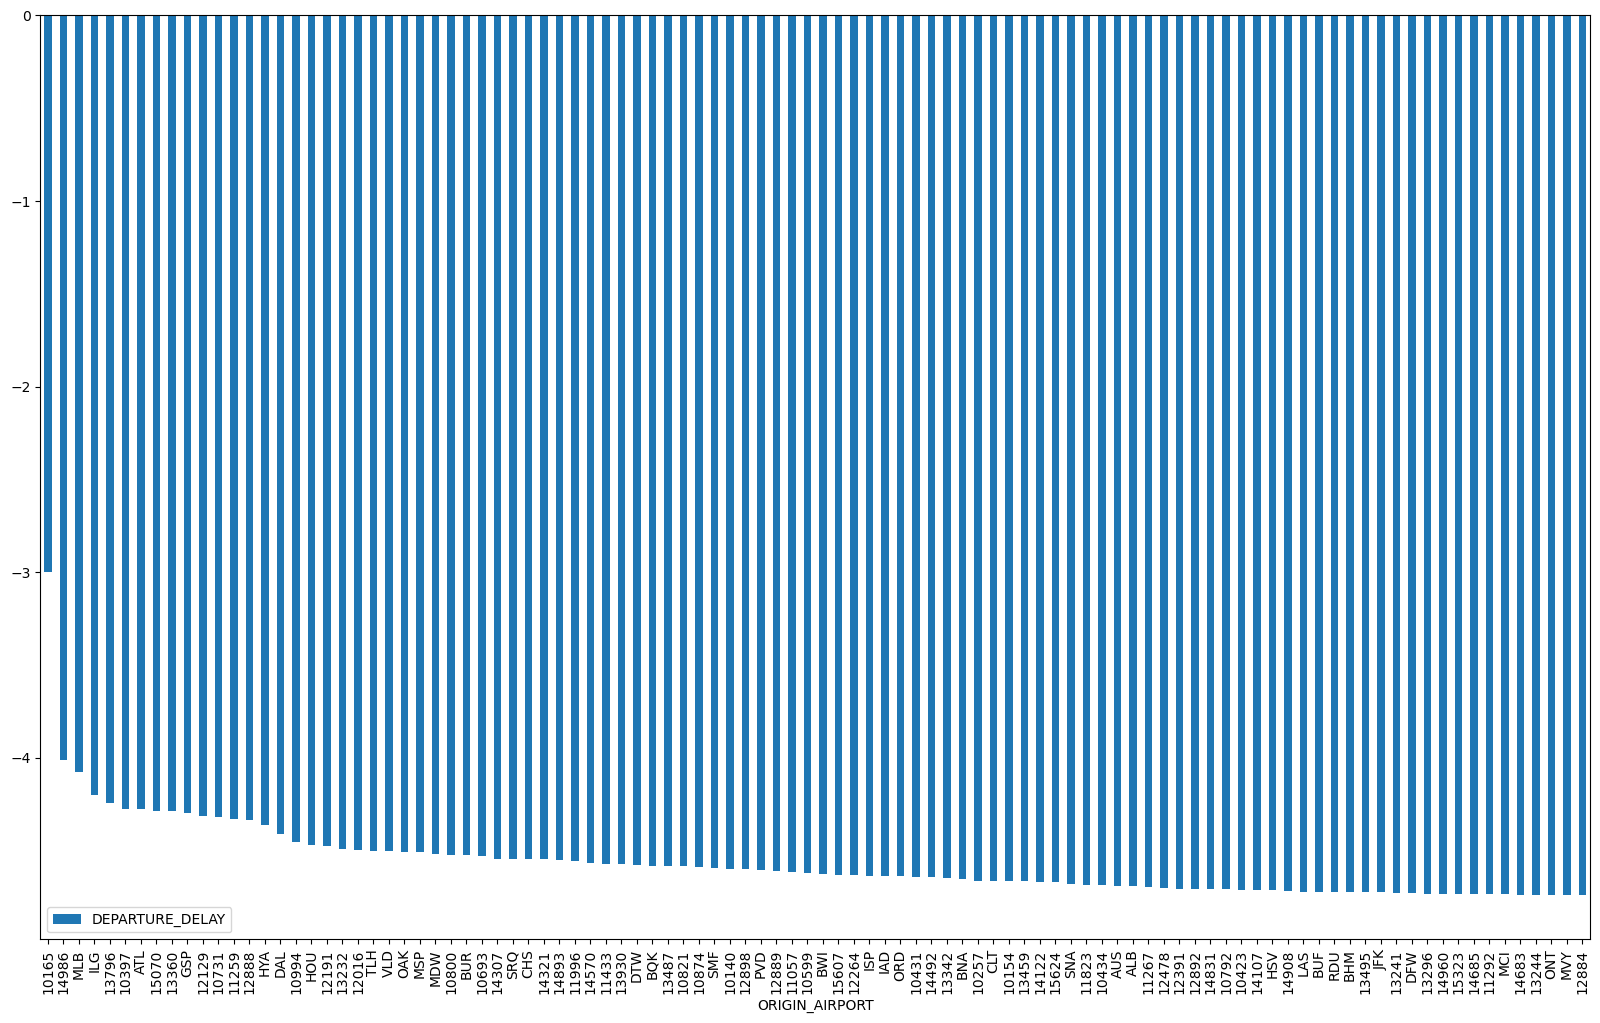

In [155]:

import pandas as pd
import matplotlib.pyplot as plt
departure_airport_group = df_flights.groupby(df_flights.ORIGIN_AIRPORT)

mean_departure_delays = pd.DataFrame(departure_airport_group['DEPARTURE_DELAY'].mean()).sort_values('DEPARTURE_DELAY', ascending=False)
mean_departure_delays_top100 = mean_departure_delays.head(100)
mean_departure_delays_top100.plot(kind = "bar", figsize=(20,12))
#plt.xticks(rotation=90)
mean_departure_delays_top100

<Axes: title={'center': 'DEPARTURE_DELAY'}, xlabel='ARRIVAL_DELAY'>

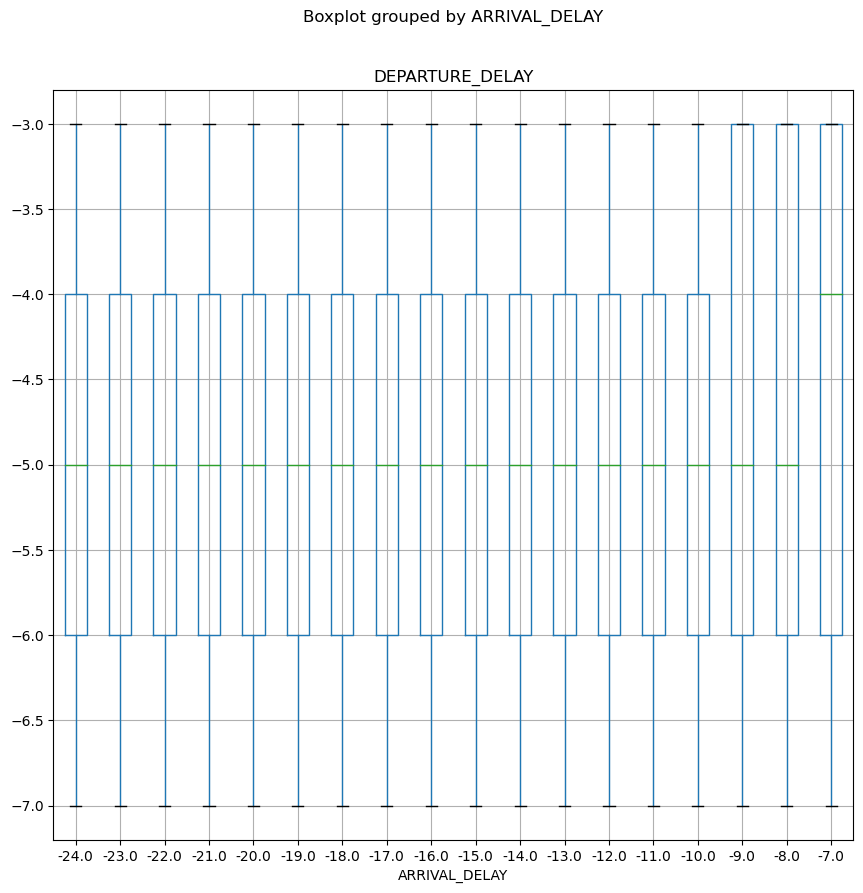

In [132]:
df_flights.boxplot(column='DEPARTURE_DELAY', by='ARRIVAL_DELAY', figsize=(10,10))

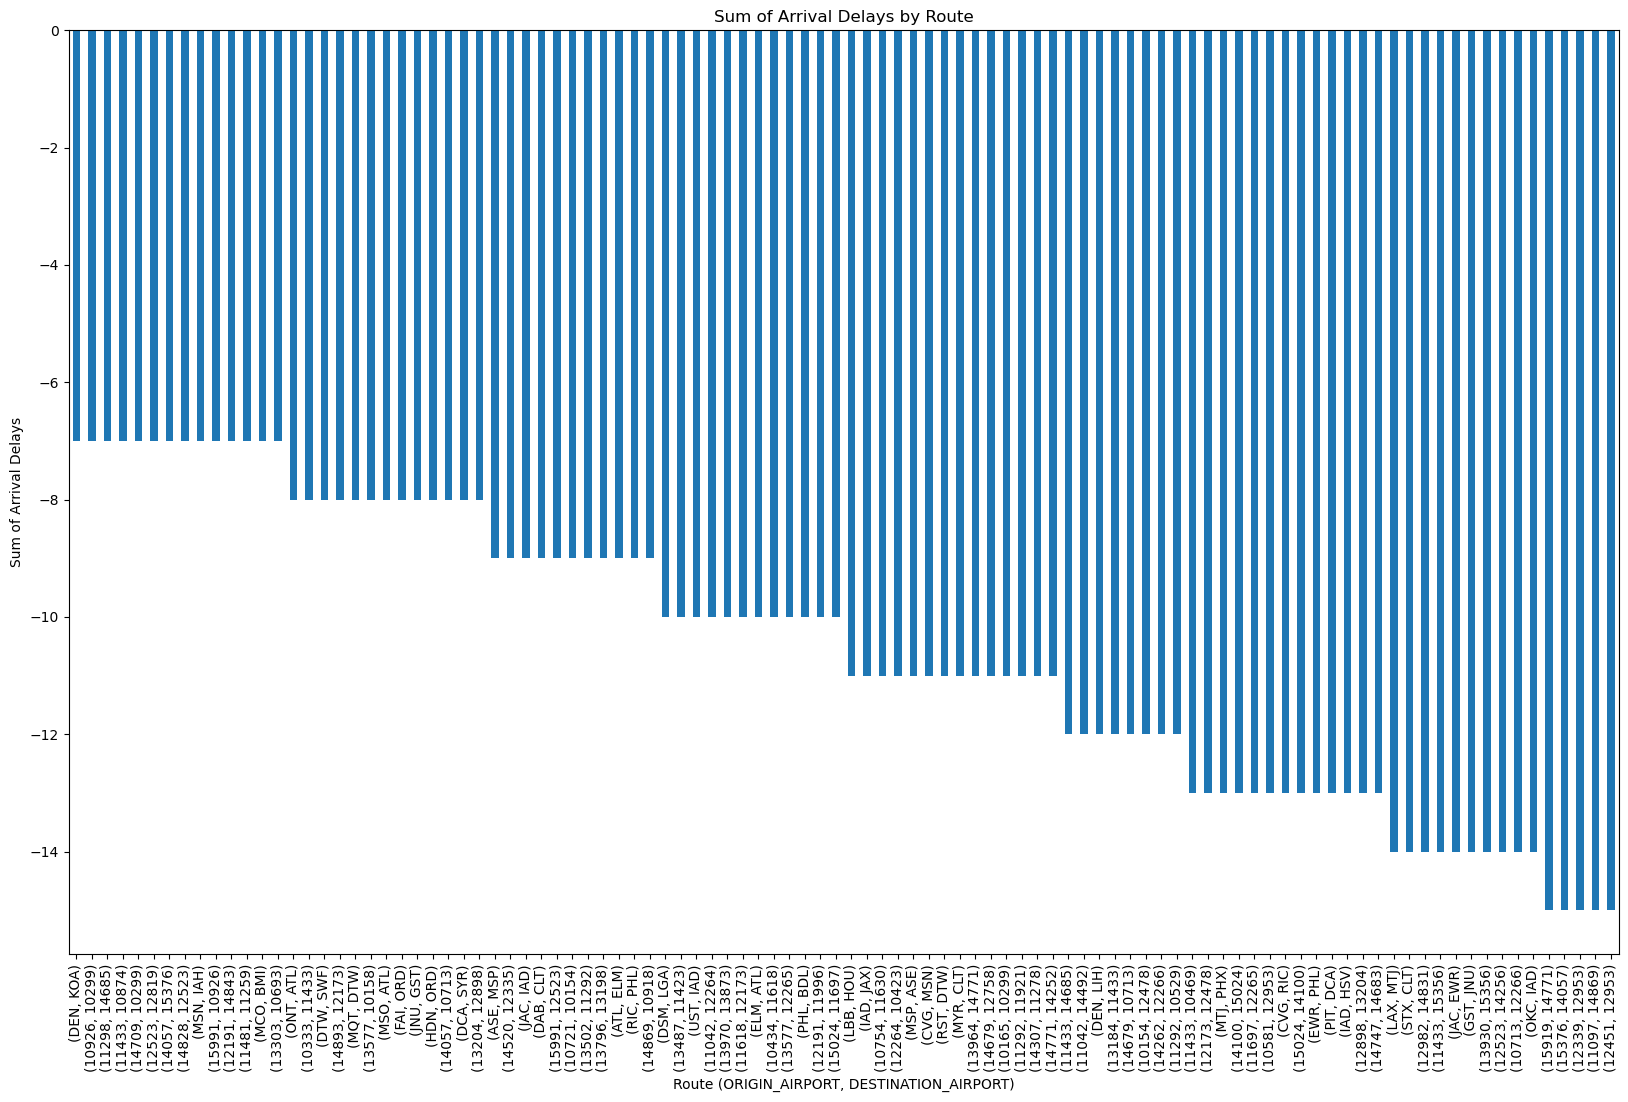

ORIGIN_AIRPORT  DESTINATION_AIRPORT
DEN             KOA                    -7.0
10926           10299                  -7.0
11298           14685                  -7.0
11433           10874                  -7.0
14709           10299                  -7.0
                                       ... 
15919           14771                 -15.0
15376           14057                 -15.0
12339           12953                 -15.0
11097           14869                 -15.0
12451           12953                 -15.0
Name: ARRIVAL_DELAY, Length: 100, dtype: float64

In [156]:
# Group by routes and calculate sum of arrival delays
route_group = df_flights.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
sum_arrival_delays = route_group['ARRIVAL_DELAY'].sum().sort_values(ascending=False)
sum_arrival_delays_top100 = sum_arrival_delays.head(100)

# Create a bar plot
plt.figure(figsize=(20, 12))
ax = sum_arrival_delays_top100.plot(kind="bar")

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90) 

# Add labels and title
plt.xlabel('Route (ORIGIN_AIRPORT, DESTINATION_AIRPORT)')
plt.ylabel('Sum of Arrival Delays')
plt.title('Sum of Arrival Delays by Route')

# Show the plot
plt.show()

# Display the DataFrame
sum_arrival_delays_top100


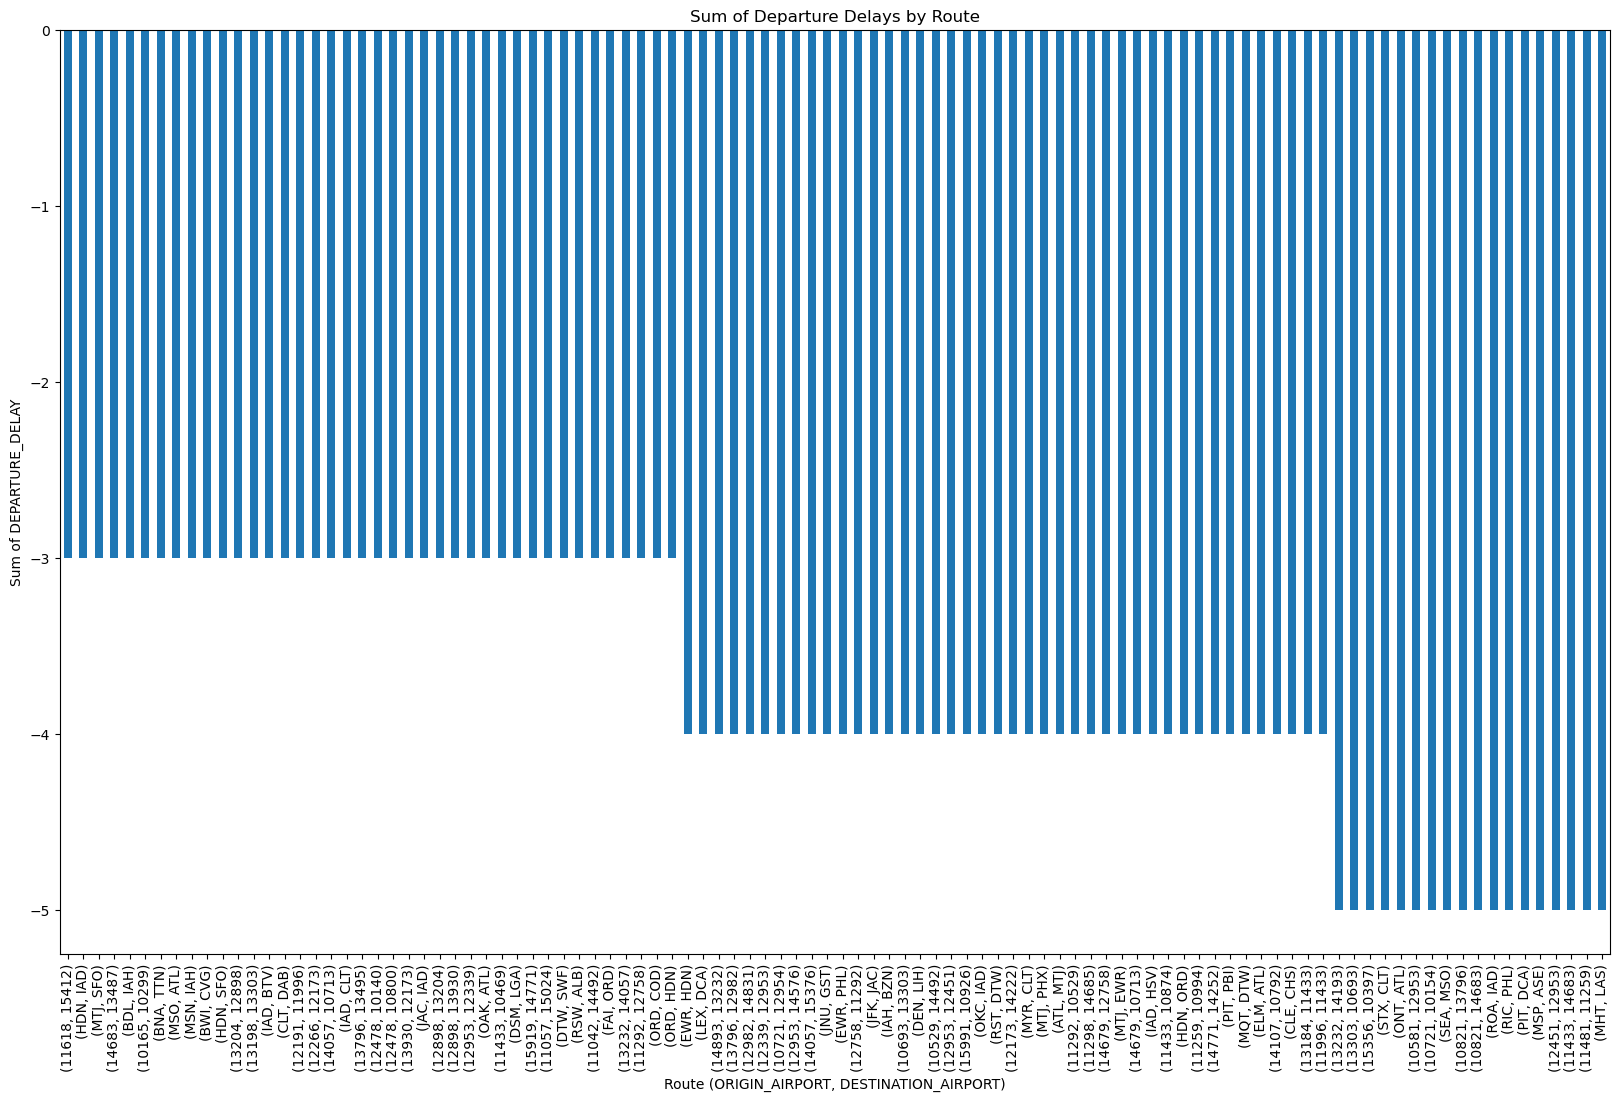

ORIGIN_AIRPORT  DESTINATION_AIRPORT
11618           15412                 -3.0
HDN             IAD                   -3.0
MTJ             SFO                   -3.0
14683           13487                 -3.0
BDL             IAH                   -3.0
                                      ... 
MSP             ASE                   -5.0
12451           12953                 -5.0
11433           14683                 -5.0
11481           11259                 -5.0
MHT             LAS                   -5.0
Name: DEPARTURE_DELAY, Length: 100, dtype: float64

In [160]:
# Group by routes and calculate sum of arrival delays
route_group = df_flights.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
sum_Departure_delays = route_group['DEPARTURE_DELAY'].sum().sort_values(ascending=False)
sum_Departure_delays_top100 = sum_Departure_delays.head(100)
# Create a bar plot
plt.figure(figsize=(20, 12))
ax = sum_Departure_delays_top100.plot(kind="bar")

# Rotate x-axis labels by 90 degrees
# plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Route (ORIGIN_AIRPORT, DESTINATION_AIRPORT)')
plt.ylabel('Sum of DEPARTURE_DELAY')
plt.title('Sum of Departure Delays by Route')

# Show the plot
plt.show()

# Display the DataFrame
sum_Departure_delays_top100